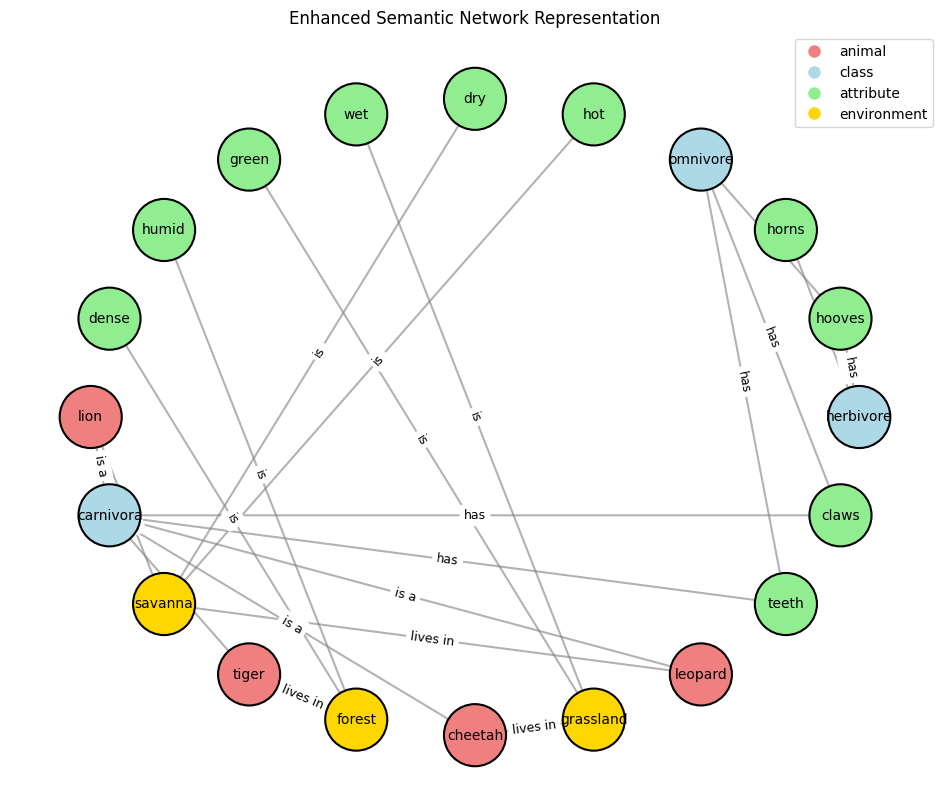

In [8]:
# Import the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the directed graph
G = nx.DiGraph()

# Define nodes and relationships
nodes = {
    'lion': {'is a': 'carnivora', 'lives in': 'savanna'},
    'tiger': {'is a': 'carnivora', 'lives in': 'forest'},
    'cheetah': {'is a': 'carnivora', 'lives in': 'grassland'},
    'leopard': {'is a': 'carnivora', 'lives in': 'savanna'},
    'carnivora': {'has': ['teeth', 'claws']},
    'herbivore': {'has': ['hooves', 'horns']},
    'omnivore': {'has': ['teeth', 'claws', 'hooves']},
    'savanna': {'is': ['hot', 'dry']},
    'grassland': {'is': ['wet', 'green']},
    'forest': {'is': ['humid', 'dense']}
}

# Assign colors to categories for a more visually organized graph
node_colors = {
    'animal': 'lightcoral',
    'class': 'lightblue',
    'attribute': 'lightgreen',
    'environment': 'gold'
}

# Categorize nodes
categories = {
    'lion': 'animal', 'tiger': 'animal', 'cheetah': 'animal', 'leopard': 'animal',
    'carnivora': 'class', 'herbivore': 'class', 'omnivore': 'class',
    'savanna': 'environment', 'grassland': 'environment', 'forest': 'environment',
    'teeth': 'attribute', 'claws': 'attribute', 'hooves': 'attribute', 'horns': 'attribute',
    'hot': 'attribute', 'dry': 'attribute', 'wet': 'attribute', 'green': 'attribute',
    'humid': 'attribute', 'dense': 'attribute'
}

# Add nodes and edges to the graph
for node, relationships in nodes.items():
    G.add_node(node, color=node_colors[categories[node]])  # Add each node with color attribute

    # Add relationships as edges
    for relation, targets in relationships.items():
        if isinstance(targets, list):
            for target in targets:
                G.add_node(target, color=node_colors[categories[target]])  # Add attribute node
                G.add_edge(node, target, label=relation)
        else:
            G.add_edge(node, targets, label=relation)

# Draw the graph
plt.figure(figsize=(12, 10))

# Choose a layout
pos = nx.shell_layout(G)

# Draw nodes with color based on their category
node_color_list = [nx.get_node_attributes(G, 'color')[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_color_list, edgecolors='black', linewidths=1.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Draw edges with labels
edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=1.5, alpha=0.6)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color='black')

# Display the graph with a title and legend
plt.title("Enhanced Semantic Network Representation")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=key, 
             markerfacecolor=value, markersize=10) for key, value in node_colors.items()],
           loc='upper right')
plt.axis('off')
plt.show()
